# **Problem Statement: Market Segmentation for Austrian Winter Tourism (1991/92 vs. 1997/98)**


**Problem:**Despite Austria's popularity as a winter tourism destination, it is unclear how tourist behaviors and preferences have evolved over time. While the 1991/92 market segmentation provides valuable insights, changes in the tourism landscape, such as an increased focus on shopping and a shift in the demand for alpine skiing, suggest that existing segments may no longer accurately reflect the current market. Without a clear understanding of these segment changes, the Austrian National Tourism Organisation risks misaligning its marketing strategies and resource allocation.



In [ ]:
import pandas as pd

# Load the data (replace 'wi91act.csv' and 'wi97act.csv' with actual file paths)
wi91act = pd.read_csv('/content/1991_92_11_activities.csv')
wi97act = pd.read_csv('/content/1991_92_11_activities.csv')


In [ ]:
# Calculate the mean for each column (activity) in both datasets
p91 = wi91act.mean()
p97 = wi97act.mean()

# Convert the proportions to percentages
p91_percent = (p91 * 100).round(0)
p97_percent = (p97 * 100).round(0)

print(p91_percent)
print(p97_percent)


alpine skiing           71.0
cross-country skiing    18.0
ski touring              9.0
ice-skating              6.0
sleigh riding           16.0
hiking                  30.0
relaxing                51.0
shopping                25.0
sight-seeing            11.0
museums                  6.0
pool/sauna              30.0
dtype: float64
alpine skiing           71.0
cross-country skiing    18.0
ski touring              9.0
ice-skating              6.0
sleigh riding           16.0
hiking                  30.0
relaxing                51.0
shopping                25.0
sight-seeing            11.0
museums                  6.0
pool/sauna              30.0
dtype: float64


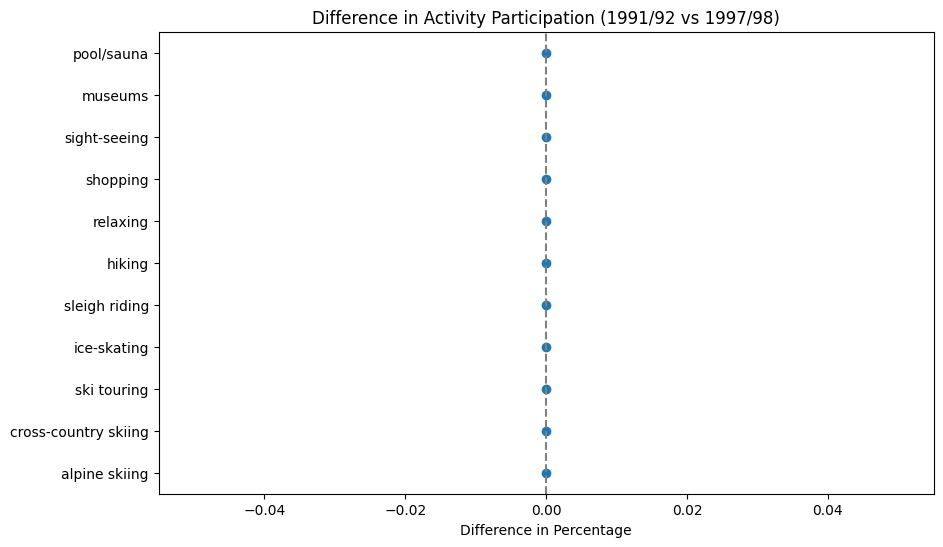

In [ ]:
import matplotlib.pyplot as plt

# Calculate the difference in activity participation between 1991/92 and 1997/98
diff = (p97 - p91) * 100

# Sort the differences
sorted_diff = diff.sort_values()

# Create the dot chart
plt.figure(figsize=(10, 6))
plt.plot(sorted_diff.values, sorted_diff.index, 'o')
plt.axvline(x=0, color='gray', linestyle='--')
plt.xlabel("Difference in Percentage")
plt.title("Difference in Activity Participation (1991/92 vs 1997/98)")
plt.show()


In [ ]:
from sklearn.cluster import KMeans

# Set up KMeans for 6 clusters
kmeans = KMeans(n_clusters=6, random_state=1234, n_init=20)

# Fit the model to the 1991/92 data
kmeans.fit(wi91act)

# Add the cluster labels to the original data
wi91act['Segment'] = kmeans.labels_

# To check the segmentation profile (similar to the barchart in R)
segment_means = wi91act.groupby('Segment').mean()

# Print or visualize segment means
print(segment_means)


         alpine skiing  cross-country skiing  ski touring  ice-skating  \
Segment                                                                  
0             0.000000              0.254157     0.011876     0.021378   
1             0.830508              0.163136     0.088983     0.074153   
2             0.866450              0.143322     0.117264     0.055375   
3             0.812981              0.146315     0.088009     0.030803   
4             0.762004              0.150313     0.075157     0.035491   
5             0.931034              0.306897     0.172414     0.203448   

         sleigh riding    hiking  relaxing  shopping  sight-seeing   museums  \
Segment                                                                        
0             0.080760  0.997625  0.679335  0.249406      0.237530  0.140143   
1             0.108051  0.167373  0.343220  0.105932      0.105932  0.048729   
2             0.000000  0.342020  0.951140  1.000000      0.123779  0.058632   
3      

<ipython-input-6-2bcfee57306c>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Participation', y='Activity', hue='Segment', data=wi91act_melted, ci=None)


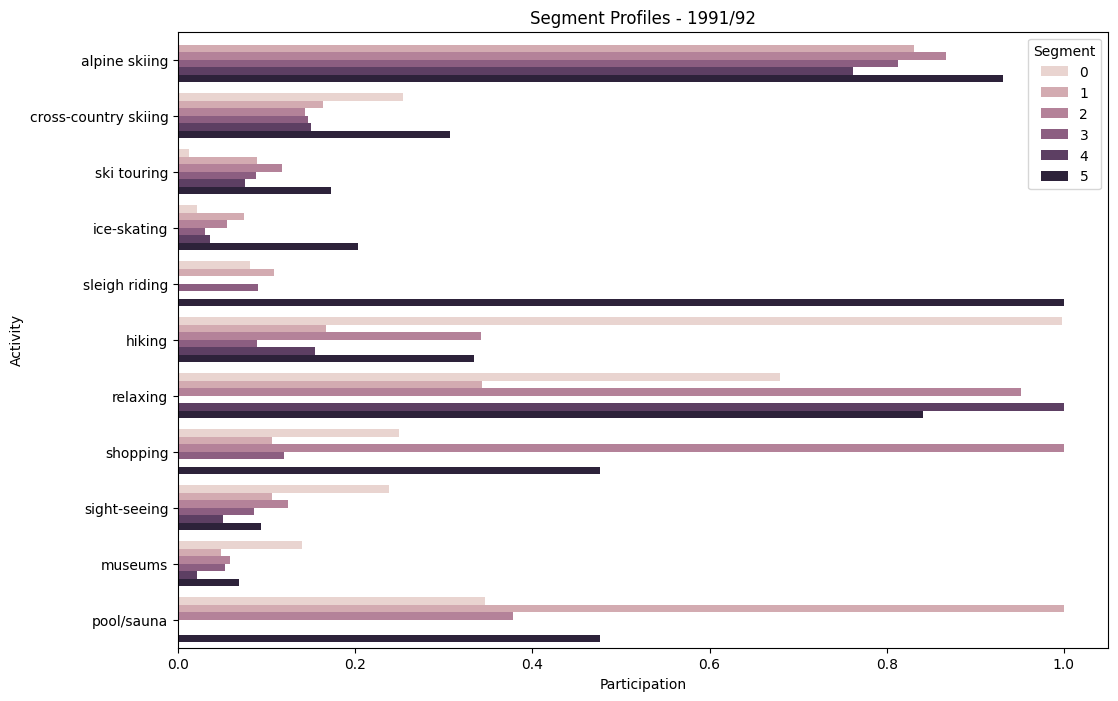

In [ ]:
import seaborn as sns

# Melt the data for easy plotting
wi91act_melted = pd.melt(wi91act, id_vars='Segment', var_name='Activity', value_name='Participation')

# Plot the segment profiles
plt.figure(figsize=(12, 8))
sns.barplot(x='Participation', y='Activity', hue='Segment', data=wi91act_melted, ci=None)
plt.title("Segment Profiles - 1991/92")
plt.show()


In [ ]:
# Predict segment membership for 1997/98 data
wi97act['Segment'] = kmeans.predict(wi97act)

# Calculate the segment sizes
segment_sizes_97 = wi97act['Segment'].value_counts(normalize=True) * 100
print(segment_sizes_97)


Segment
3    31.584434
4    16.643502
1    16.400278
0    14.628214
2    10.667130
5    10.076442
Name: proportion, dtype: float64


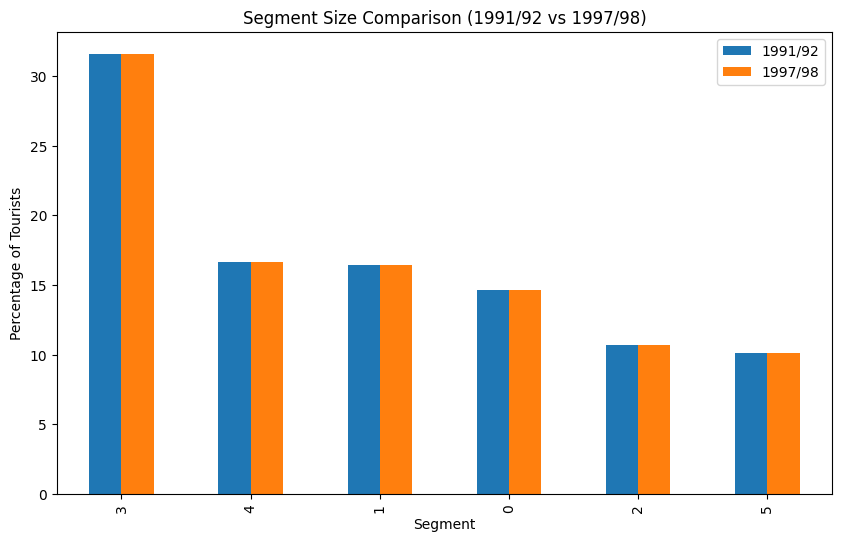

In [ ]:
# Calculate segment sizes for 1991/92
segment_sizes_91 = wi91act['Segment'].value_counts(normalize=True) * 100

# Create a DataFrame for comparison
segment_comparison = pd.DataFrame({
    '1991/92': segment_sizes_91,
    '1997/98': segment_sizes_97
}).fillna(0)

# Plot the segment size comparison
segment_comparison.plot(kind='bar', figsize=(10, 6))
plt.title("Segment Size Comparison (1991/92 vs 1997/98)")
plt.ylabel("Percentage of Tourists")
plt.show()
